In [31]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 加载音频文件
file = r"C:\Users\mizzle\Desktop\depression\data\self_control\self_0\MY049-高昌磊-20221122-语音.wav"
# file =r"C:\Users\mizzle\Desktop\MY049-高昌磊-20221122-语音.wav"  # 替换为你的音频文件路径
data, sampling_rate = librosa.load(file, sr=None)

# 音频增强操作
noises = data + 0.05 * np.random.randn(len(data))  # 添加噪声
pitches = librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=2)  # 改变音高
stretches = librosa.effects.time_stretch(data, rate=2)  # 改变播放速度
volumes = data * 2  # 调整音量

# 切割音频
mid_index = len(data) // 2
cut1 = data[:mid_index]
cut2 = data[mid_index:]

data_dic = {
    "origin": data,
    "noises": noises,
    "pitches":pitches,
    "stretches":stretches,
    "volumes":volumes,
    "cut1":cut1,
    "cut2":cut2
}


In [32]:
def plot_melchroma(data, name):
    # --------------------- 1. 绘制波形图 ---------------------
    # plt.figure(figsize=(10, 3))
    # librosa.display.waveshow(data, sr=sampling_rate, color='b')
    # plt.title('Audio Waveform')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')

    # --------------------- 2. 绘制梅尔频谱 ---------------------
    # plt.figure(figsize=(10, 3))
    # mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)
    # mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    # librosa.display.specshow(mel_db, sr=sampling_rate, x_axis='time', y_axis='mel', cmap='viridis')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Mel Spectrogram')

    # --------------------- 3. 绘制色度特征 ---------------------
    plt.figure(figsize=(5, 3))
    chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate)
    librosa.display.specshow(chroma, sr=sampling_rate, x_axis='time', y_axis='chroma', cmap='coolwarm')
    # plt.colorbar()
    # plt.title('Chroma Features')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f'../result/figures/{name}.png', dpi=300, bbox_inches="tight", transparent=True) # transparent透明背景

    # 调整布局并显示
    plt.tight_layout()
    # plt.show()

origin
noises
pitches
stretches
volumes
cut1
cut2


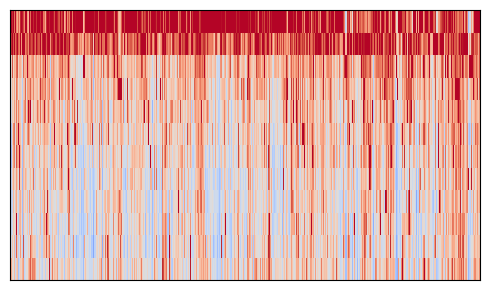

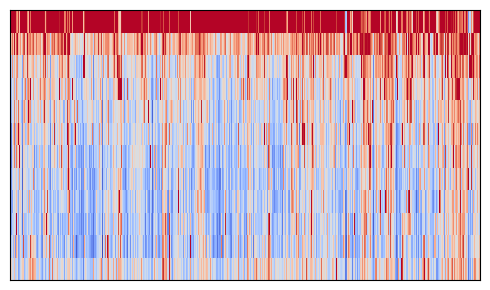

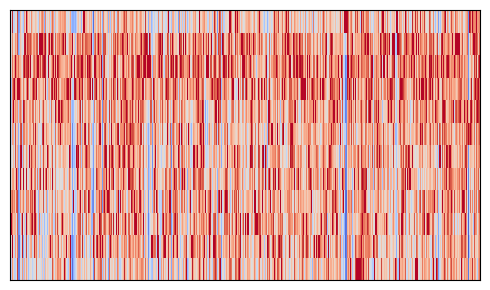

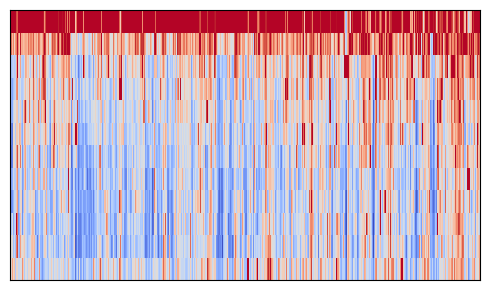

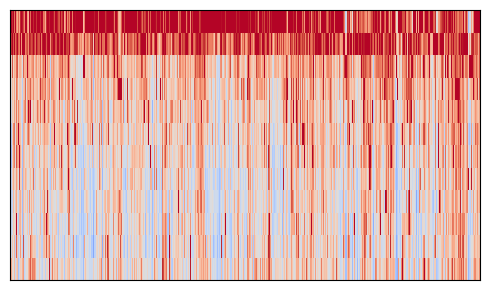

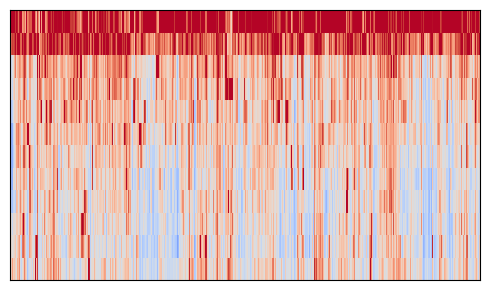

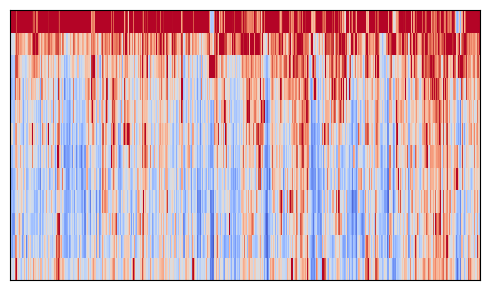

In [33]:
for k ,v in data_dic.items():
    print(k)
    plot_melchroma(v,k)